In [1]:
import os
import zarr
from config import DATA_DIR, TARGET_DIR
import numpy as np

def process_experiment_runs(base_dir):
    data_results = {}

    for ts_folder in os.listdir(base_dir):
        ts_path = os.path.join(base_dir, ts_folder)

        zarr_path = os.path.join(ts_path, "VoxelSpacing10.000/denoised.zarr")
        if os.path.exists(zarr_path):
            print(f"Traitement de {ts_folder}...")

            zgroup = zarr.open_group(zarr_path, mode='r')

            print(f"Arborescence pour {ts_folder}:")
            print(zgroup.tree())

            ts_data = {}

            for subgroup_key in zgroup.keys():
                subgroup = zgroup[subgroup_key]

                ts_data[subgroup_key] = {
                    "attrs": dict(subgroup.attrs),
                    "info": subgroup.info,
                    "data": subgroup[:],
                }

            data_results[ts_folder] = ts_data

    return data_results

all_data = process_experiment_runs(DATA_DIR)

print("Traitement terminé. Résumé des données extraites :")
for ts_name, ts_content in all_data.items():
    print(f"- {ts_name}: {len(ts_content)} sous-groupes traités.")


Traitement de TS_5_4...
Arborescence pour TS_5_4:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_69_2...
Arborescence pour TS_69_2:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_6_4...
Arborescence pour TS_6_4:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_6_6...
Arborescence pour TS_6_6:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_73_6...
Arborescence pour TS_73_6:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_86_3...
Arborescence pour TS_86_3:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32
Traitement de TS_99_9...
Arborescence pour TS_99_9:
/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158)

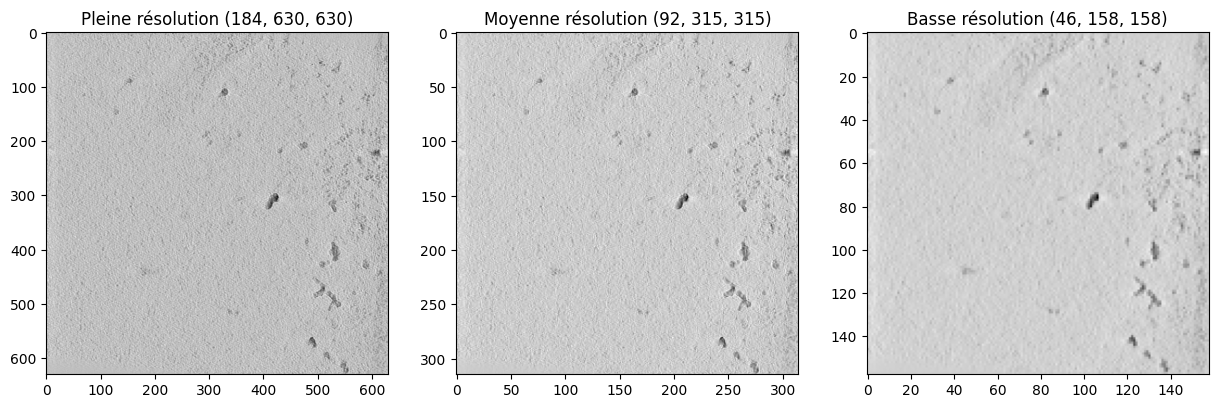

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(all_data['TS_5_4']['0']['data'][0,:,:], cmap='gray')
axs[0].set_title("Pleine résolution (184, 630, 630)")
axs[1].imshow(all_data['TS_5_4']['1']['data'][0,:,:], cmap='gray')
axs[1].set_title("Moyenne résolution (92, 315, 315)")
axs[2].imshow(all_data['TS_5_4']['2']['data'][0,:,:], cmap='gray')
axs[2].set_title("Basse résolution (46, 158, 158)")
plt.show()

In [3]:
import json
import os

def load_targets(base_path):
    target_data = {}

    for tomogram_folder in os.listdir(base_path):
        tomogram_path = os.path.join(base_path, tomogram_folder)

        picks_path = os.path.join(tomogram_path, "Picks")
        if not os.path.exists(picks_path):
            print(f"Pas de dossier 'Picks' dans {tomogram_folder}")
            continue

        for json_file in os.listdir(picks_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(picks_path, json_file)

                with open(json_path, 'r') as f:
                    data = json.load(f)

                molecule_name = data.get("pickable_object_name", "inconnu")
                points = data.get("points", [])

                if tomogram_folder not in target_data:
                    target_data[tomogram_folder] = {}

                target_data[tomogram_folder][molecule_name] = points

    return target_data

all_targets = load_targets(TARGET_DIR)

print("Résumé des données de targets :")
for tomogram, molecules in all_targets.items():
    print(f"- {tomogram}: {len(molecules)} molécules trouvées")
    for molecule, points in molecules.items():
        print(f"  * {molecule}: {len(points)} points")


Résumé des données de targets :
- TS_5_4: 6 molécules trouvées
  * apo-ferritin: 46 points
  * beta-amylase: 10 points
  * beta-galactosidase: 12 points
  * ribosome: 31 points
  * thyroglobulin: 30 points
  * virus-like-particle: 11 points
- TS_69_2: 6 molécules trouvées
  * apo-ferritin: 35 points
  * beta-amylase: 12 points
  * beta-galactosidase: 16 points
  * ribosome: 37 points
  * thyroglobulin: 34 points
  * virus-like-particle: 9 points
- TS_6_4: 6 molécules trouvées
  * apo-ferritin: 58 points
  * beta-amylase: 9 points
  * beta-galactosidase: 12 points
  * ribosome: 74 points
  * thyroglobulin: 30 points
  * virus-like-particle: 10 points
- TS_6_6: 6 molécules trouvées
  * apo-ferritin: 41 points
  * beta-amylase: 14 points
  * beta-galactosidase: 11 points
  * ribosome: 23 points
  * thyroglobulin: 35 points
  * virus-like-particle: 19 points
- TS_73_6: 6 molécules trouvées
  * apo-ferritin: 95 points
  * beta-amylase: 12 points
  * beta-galactosidase: 14 points
  * ribosom

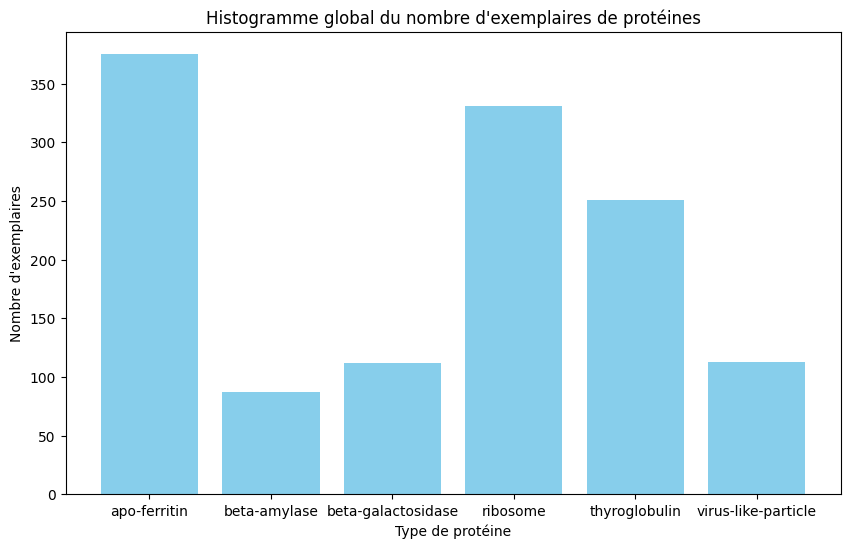

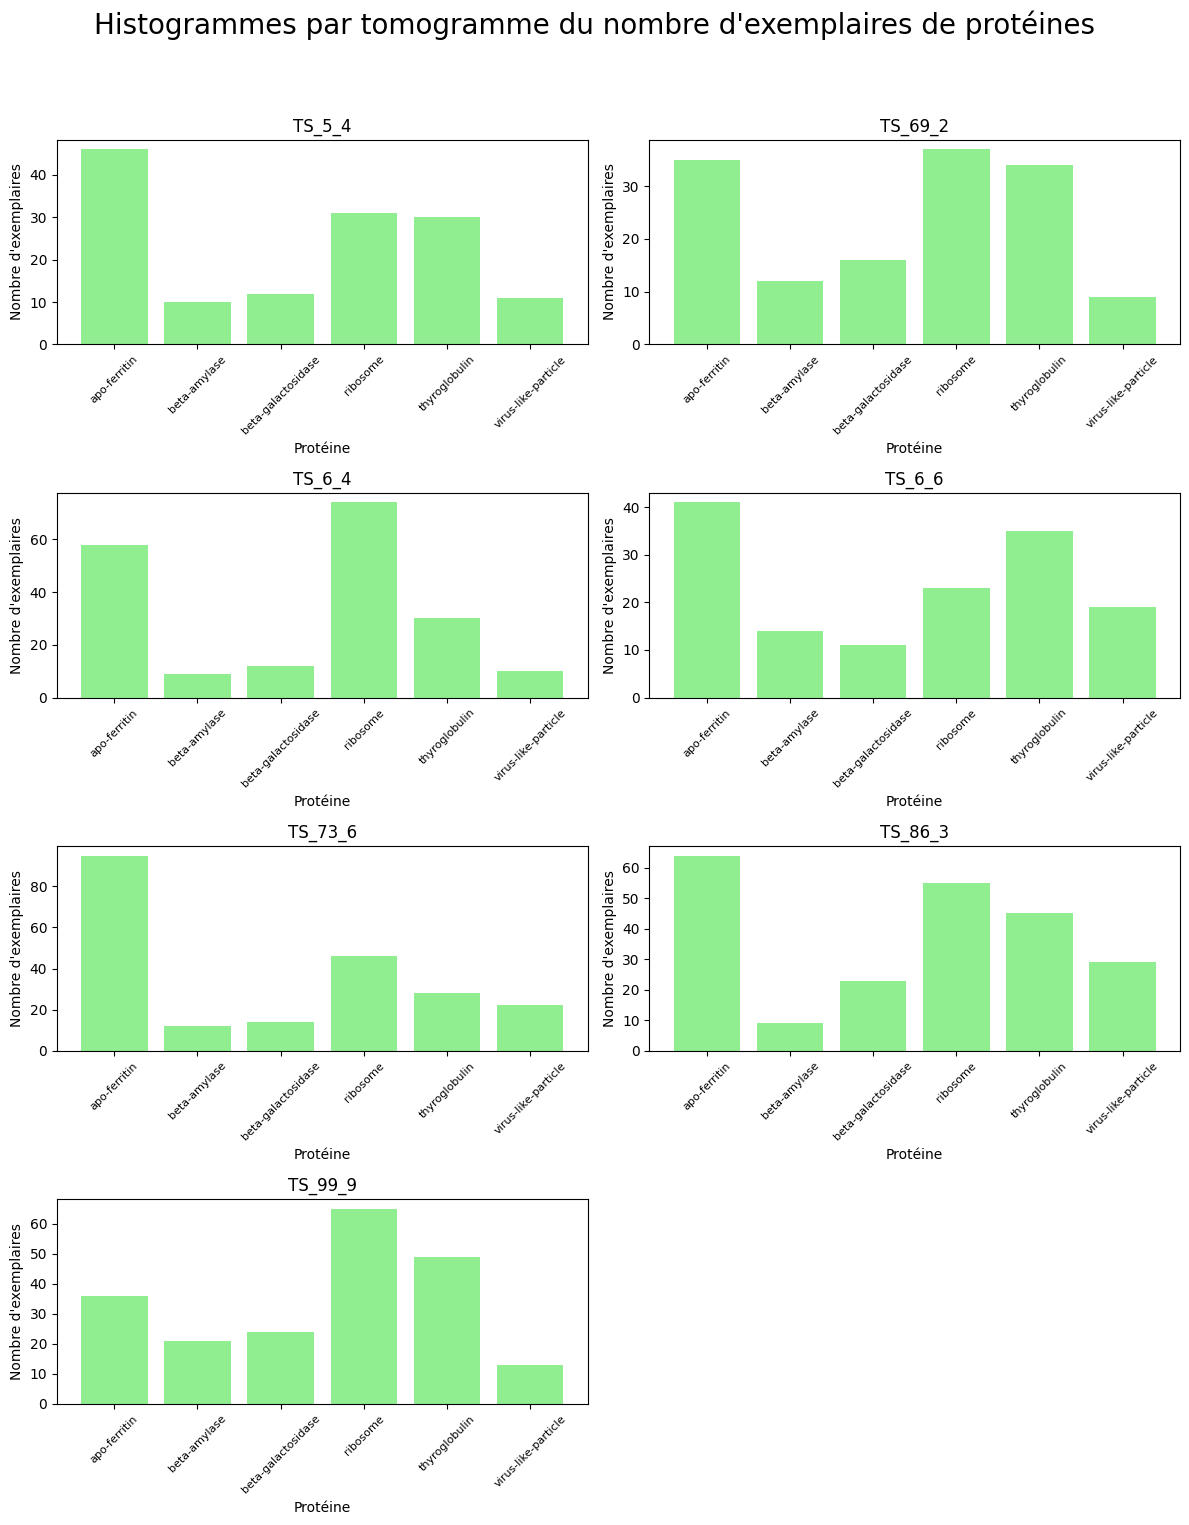

In [4]:
import matplotlib.pyplot as plt
import math

# --- Histogramme global ---
global_counts = {}
for tomogram, molecules in all_targets.items():
    for molecule, points in molecules.items():
        global_counts[molecule] = global_counts.get(molecule, 0) + len(points)

plt.figure(figsize=(10,6))
plt.bar(global_counts.keys(), global_counts.values(), color='skyblue')
plt.xlabel("Type de protéine")
plt.ylabel("Nombre d'exemplaires")
plt.title("Histogramme global du nombre d'exemplaires de protéines")
plt.show()

num_tomograms = len(all_targets)

cols = 2
rows = math.ceil(num_tomograms / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4), squeeze=False)

tomogram_names = list(all_targets.keys())
for idx, tomogram in enumerate(tomogram_names):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    
    counts = {molecule: len(points) for molecule, points in all_targets[tomogram].items()}
    
    ax.bar(counts.keys(), counts.values(), color='lightgreen')
    ax.set_title(tomogram)
    ax.set_xlabel("Protéine")
    ax.set_ylabel("Nombre d'exemplaires")
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)

total_plots = rows * cols
if num_tomograms < total_plots:
    for idx in range(num_tomograms, total_plots):
        row = idx // cols
        col = idx % cols
        fig.delaxes(axes[row][col])

plt.suptitle("Histogrammes par tomogramme du nombre d'exemplaires de protéines", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [5]:
import os
import zarr
import json

def prepare_dataset(image_path, target_path):
    """
    Prépare un dataset associant les données d'images aux targets (protéines et positions).
    
    Args:
        image_path (str): Chemin vers le dossier contenant les images Zarr.
        target_path (str): Chemin vers le dossier contenant les targets (fichiers JSON).

    Returns:
        list: Liste de dictionnaires, où chaque élément contient les données d'un tomogramme :
            - "name": Nom du tomogramme.
            - "images": Liste des résolutions (volumes 3D).
            - "targets": Dictionnaire {type_molécule: [positions (x, y, z)]}.
    """
    dataset = []

    for tomogram_name in os.listdir(image_path):
        tomogram_image_path = os.path.join(image_path, tomogram_name, "VoxelSpacing10.000/denoised.zarr")
        tomogram_target_path = os.path.join(target_path, tomogram_name, "Picks")

        if not os.path.exists(tomogram_image_path):
            print(f"Images non trouvées pour {tomogram_name}, ignoré.")
            continue

        if not os.path.exists(tomogram_target_path):
            print(f"Targets non trouvés pour {tomogram_name}, ignoré.")
            continue

        zgroup = zarr.open_group(tomogram_image_path, mode='r')
        sorted_keys = sorted(zgroup.keys(), key=lambda k: np.prod(zgroup[k].shape), reverse=True)
        images = [zgroup[key][:] for key in sorted_keys]

        targets = {}
        for json_file in os.listdir(tomogram_target_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(tomogram_target_path, json_file)
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    molecule_name = data.get("pickable_object_name", "unknown")
                    points = [
                        [point["location"]["x"], point["location"]["y"], point["location"]["z"]]
                        for point in data["points"]
                    ]
                    if molecule_name not in targets:
                        targets[molecule_name] = []
                    targets[molecule_name].extend(points)

        dataset.append({
            "name": tomogram_name,
            "images": images,
            "targets": targets
        })

    return dataset

def print_shapes(dataset):
    for tomogram in dataset:
        print(f"Tomogramme {tomogram['name']}:")
        for i, image in enumerate(tomogram['images']):
            print(f"  - Résolution {i}: {image.shape}")




In [6]:
dataset = prepare_dataset(DATA_DIR, TARGET_DIR)

print_shapes(dataset)

print(f"Nom du tomogramme : {dataset[0]['name']}")
print(f"Forme de l'image (résolution 1) : {dataset[0]['images'][0].shape}")
print(f"Targets : {dataset[0]['targets']}")

Tomogramme TS_5_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_69_2:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_73_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_86_3:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_99_9:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Nom du tomogramme : TS_5_4
Forme de l'image (résolution 1) : (184, 630, 630)
Targets : {'apo-ferritin': [[468.514, 5915.906, 604.167], [5674.694, 1114.354, 565.068

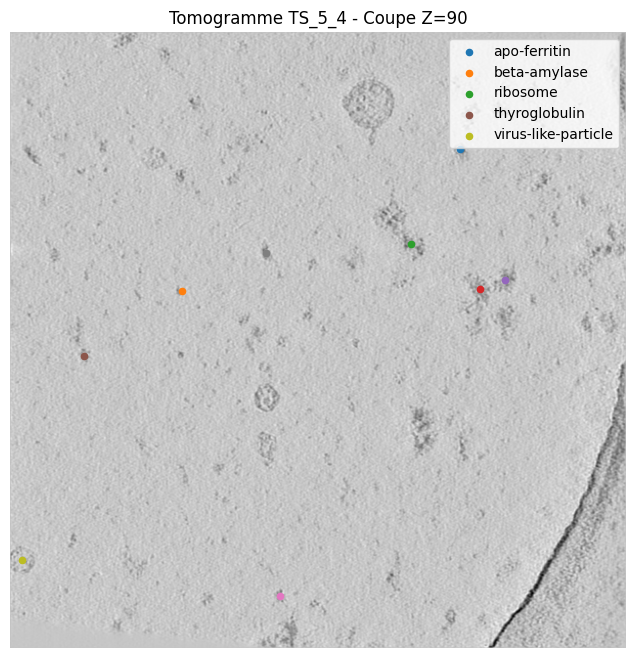

In [7]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

voxel_size = 10

tomogram_folder = 'TS_5_4'
resolution_group = '0'
slice_index = 90

tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - Coupe Z={slice_index}")

if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]

    legend_entries = {}

    for molecule, points in molecules.items():
        for point in points:
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size

            if abs(z - slice_index) < 3:
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()


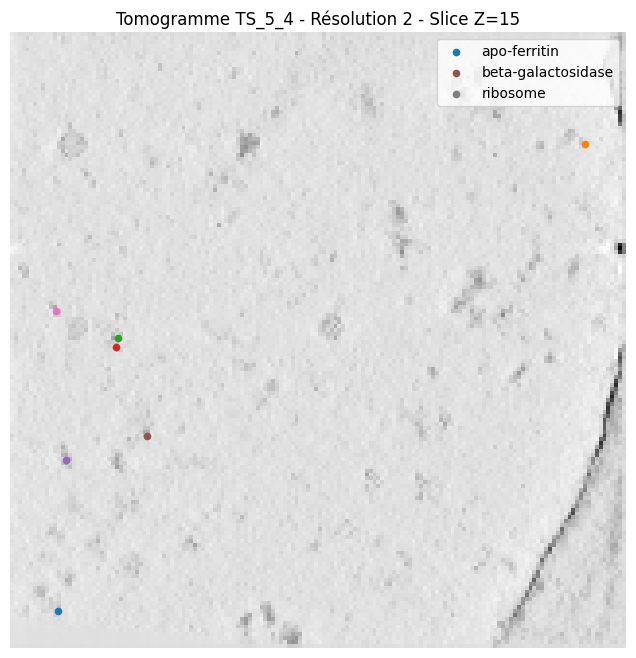

In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

voxel_size = 40
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 15

tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - Résolution 2 - Slice Z={slice_index}")

if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]

    legend_entries = {}

    for molecule, points in molecules.items():
        for point in points:
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size

            if abs(z - slice_index) < 0.75:
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()


In [9]:
import tensorflow as tf
voxel_size = 40 

class_mapping = {
    "background": 0,
    "apo-ferritin": 1,
    "beta-amylase": 2,
    "beta-galactosidase": 3,
    "ribosome": 4,
    "thyroglobulin": 5,
    "virus-like-particle": 6
}

class_labels = {
    0: "background",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "beta-galactosidase",
    4: "ribosome",
    5: "thyroglobulin",
    6: "virus-like-particle",
}

def generate_mask(volume_shape, targets, voxel_size, class_mapping, sphere_radius=2):
    """
    Crée un masque de segmentation (de dimensions volume_shape) à partir des targets.
    Pour chaque point, on convertit la position physique en indice voxel et on dessine
    une petite sphère (de rayon sphere_radius voxels) avec la classe correspondante.
    
    Args:
        volume_shape (tuple): Dimensions du volume (Z, Y, X).
        targets (dict): Dictionnaire des targets avec pour chaque molécule une liste de points.
        voxel_size (float): Facteur de conversion des coordonnées physiques en indices voxels.
        class_mapping (dict): Mapping de la molécule vers l'indice de classe (0 pour le fond, >0 pour les particules).
        sphere_radius (int): Rayon de la sphère (en voxels) à dessiner autour de chaque point.
        
    Returns:
        ndarray: Masque de segmentation de dimensions volume_shape.
    """
    mask = np.zeros(volume_shape, dtype=np.uint8)  # Fond = 0
    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        class_idx = class_mapping[molecule]
        for point in points:
            # Si le point est un dictionnaire avec la clé "location", on l'utilise
            if isinstance(point, dict) and "location" in point:
                x_coord = point["location"]["x"]
                y_coord = point["location"]["y"]
                z_coord = point["location"]["z"]
            else:
                # Sinon, on suppose que le point est une liste/tuple de coordonnées [x, y, z]
                x_coord, y_coord, z_coord = point
            
            x_center = int(round(x_coord / voxel_size))
            y_center = int(round(y_coord / voxel_size))
            z_center = int(round(z_coord / voxel_size))
            
            # Dessiner une petite sphère autour du point
            for dz in range(-sphere_radius, sphere_radius + 1):
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 + dz**2 <= sphere_radius**2:
                            z_idx = z_center + dz
                            y_idx = y_center + dy
                            x_idx = x_center + dx
                            if (0 <= z_idx < volume_shape[0] and
                                0 <= y_idx < volume_shape[1] and
                                0 <= x_idx < volume_shape[2]):
                                mask[z_idx, y_idx, x_idx] = class_idx
    return mask

def extract_grid_patches(volume, mask, num_cubes_axis):
    """
    Extrait tous les patches qui couvrent entièrement le volume en divisant chaque dimension en num_cubes_axis segments.
    On suppose que le volume est exactement divisible par num_cubes_axis sur chaque axe.
    
    Args:
        volume (ndarray): Volume 3D d'entrée, de forme (Z, Y, X).
        mask (ndarray): Masque associé, de même forme.
        num_cubes_axis (int): Nombre de segments (patchs) par axe (exemple : 4 donnera 4x4x4 = 64 patches).
        
    Returns:
        tuple: (patches_img, patches_mask) 
               - patches_img : liste de patches d'image.
               - patches_mask : liste de patches de masque.
    """
    z_dim, y_dim, x_dim = volume.shape
    patch_size_z = z_dim // num_cubes_axis
    patch_size_y = y_dim // num_cubes_axis
    patch_size_x = x_dim // num_cubes_axis
    
    patches_img = []
    patches_mask = []
    
    for i in range(num_cubes_axis):
        for j in range(num_cubes_axis):
            for k in range(num_cubes_axis):
                z0 = i * patch_size_z
                y0 = j * patch_size_y
                x0 = k * patch_size_x
                patch_img = volume[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patch_mask = mask[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patches_img.append(patch_img)
                patches_mask.append(patch_mask)
    
    return patches_img, patches_mask



In [10]:
X_train_list = []
Y_train_list = []

num_cubes_axis = 2

for tomogram in dataset:
    volume = tomogram["images"][2]
    mask_full = generate_mask(volume.shape, tomogram["targets"], voxel_size, class_mapping)
    print(f"Tomogramme {tomogram['name']} volume: {volume.shape}, masque: {mask_full.shape}")

    patches_img, patches_mask = extract_grid_patches(volume, mask_full, num_cubes_axis)

    for patch_img, patch_mask in zip(patches_img, patches_mask):
        patch_img = patch_img[..., np.newaxis]
        X_train_list.append(patch_img)
        Y_train_list.append(patch_mask)

X_train = np.array(X_train_list, dtype=np.float32)
Y_train_int = np.array(Y_train_list, dtype=np.uint8)
print("X_train shape:", X_train.shape)
print("Y_train_int shape:", Y_train_int.shape)

Y_train = tf.keras.utils.to_categorical(Y_train_int, num_classes=7)
print("Y_train shape (one-hot):", Y_train.shape)


Tomogramme TS_5_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_69_2 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_73_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_86_3 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_99_9 volume: (46, 158, 158), masque: (46, 158, 158)
X_train shape: (56, 23, 79, 79, 1)
Y_train_int shape: (56, 23, 79, 79)
Y_train shape (one-hot): (56, 23, 79, 79, 7)


In [11]:
import numpy as np
import pandas as pd

indices_with_protein = np.where((Y_train_int > 0).any(axis=(1, 2, 3)))[0]

X_train_balanced = X_train
Y_train_int_balanced = Y_train_int

unique_classes, counts = np.unique(Y_train_int_balanced, return_counts=True)

total_voxels = np.sum(counts)
percentages = (counts / total_voxels) * 100

df_percentages = pd.DataFrame({
    "Classe": [class_labels.get(int(cls), f"Classe {cls}") for cls in unique_classes],
    "Nombre de Voxels": counts,
    "Pourcentage (%)": percentages
})

print(df_percentages)


                Classe  Nombre de Voxels  Pourcentage (%)
0           background           7997156        99.486814
1         apo-ferritin             11930         0.148412
2         beta-amylase              2797         0.034795
3   beta-galactosidase              3592         0.044685
4             ribosome             10923         0.135885
5        thyroglobulin              8282         0.103030
6  virus-like-particle              3728         0.046377


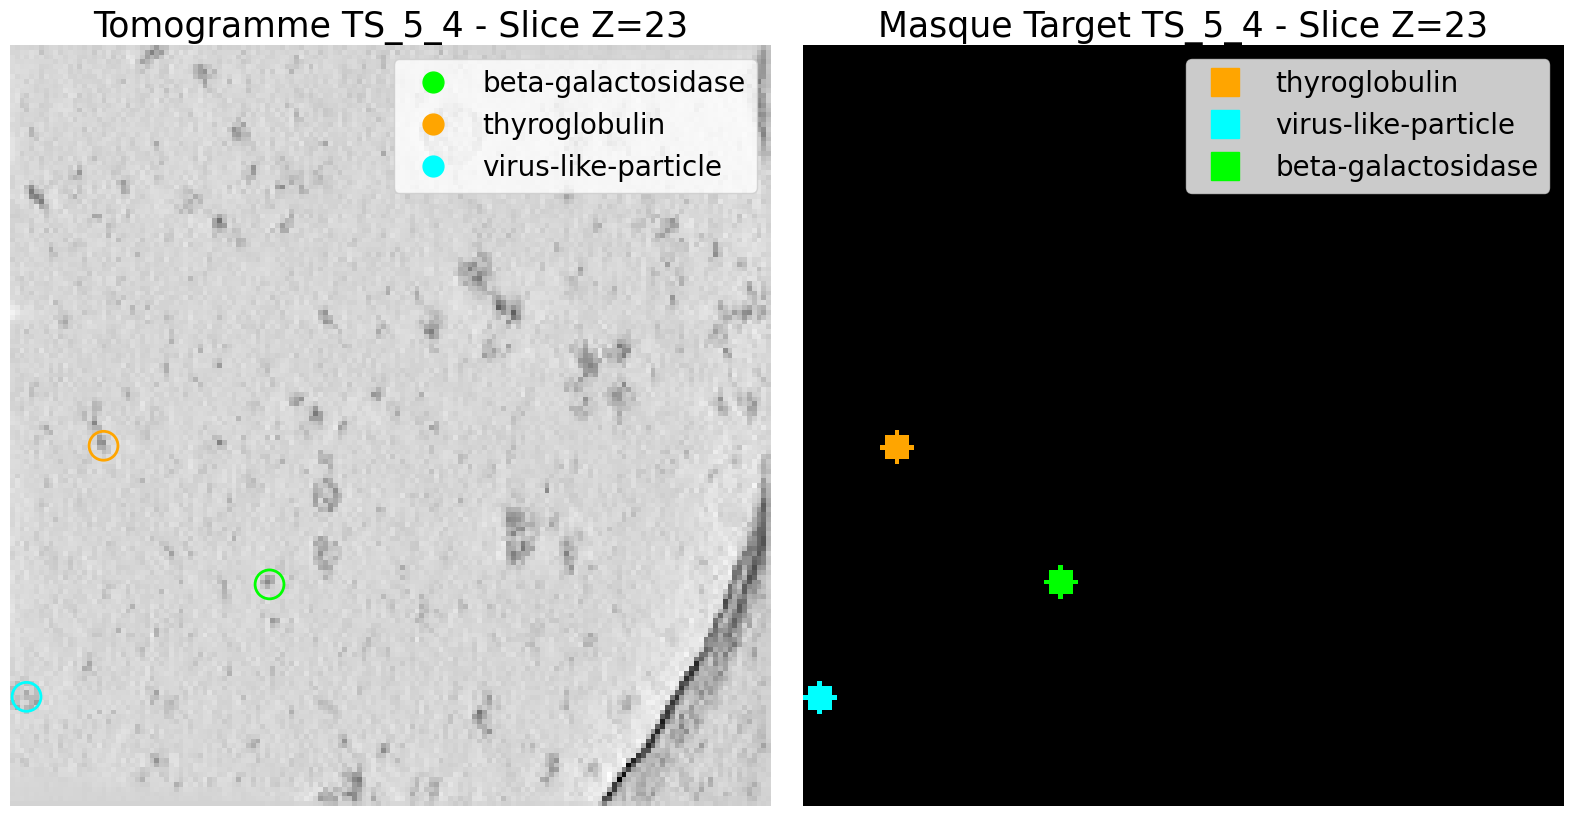

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def generate_colored_mask(volume_shape, targets, voxel_size, class_mapping, slice_index, sphere_radius=3, colors=None):
    mask_slice = np.zeros((volume_shape[1], volume_shape[2], 3), dtype=np.uint8)

    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        color = colors.get(molecule, (255, 255, 255))

        for point in points:
            x_coord = int(round(point["location"]["x"] / voxel_size))
            y_coord = int(round(point["location"]["y"] / voxel_size))
            z_coord = int(round(point["location"]["z"] / voxel_size))

            if z_coord == slice_index:
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 <= sphere_radius**2:
                            y_idx = y_coord + dy
                            x_idx = x_coord + dx
                            if 0 <= y_idx < volume_shape[1] and 0 <= x_idx < volume_shape[2]:
                                mask_slice[y_idx, x_idx] = color

    return mask_slice

def display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3):
    volume = all_data[tomogram_folder][resolution_group]['data']
    image_slice = volume[slice_index, :, :]

    targets_filtered = {}
    for molecule, points in all_targets.get(tomogram_folder, {}).items():
        filtered_points = [p for p in points if round(p["location"]["z"] / voxel_size) == slice_index]
        if filtered_points:
            targets_filtered[molecule] = filtered_points

    colors = {
        "apo-ferritin": (255, 0, 0),
        "beta-amylase": (0, 0, 255),
        "ribosome": (128, 0, 128),
        "thyroglobulin": (255, 165, 0),
        "virus-like-particle": (0, 255, 255),
        "beta-galactosidase": (0, 255, 0)
    }

    mask_colored = generate_colored_mask(volume.shape, targets_filtered, voxel_size, class_mapping, slice_index, sphere_radius, colors)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(image_slice, cmap='gray')
    axs[0].set_title(f"Tomogramme {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    legend_entries = {}
    for molecule, points in targets_filtered.items():
        color = np.array(colors.get(molecule, (255, 255, 255))) / 255
        for point in points:
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            circle = plt.Circle((x, y), radius=sphere_radius, color=color, fill=False, linewidth=2)
            axs[0].add_patch(circle)

            if molecule not in legend_entries:
                legend_entries[molecule] = plt.Line2D([0], [0], marker='o', color=color, markersize=15, linestyle='', label=molecule)

    if legend_entries:
        axs[0].legend(handles=legend_entries.values(), loc='upper right', fontsize=20)
    axs[0].axis('off')

    axs[1].imshow(mask_colored)
    axs[1].set_title(f"Masque Target {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    legend_entries_mask = [
        plt.Line2D([0], [0], marker='s', color=np.array(color)/255, markersize=20, linestyle='', label=molecule)
        for molecule, color in colors.items() if molecule in targets_filtered
    ]

    if legend_entries_mask:
        axs[1].legend(handles=legend_entries_mask, loc='upper right', fontsize=20)
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

voxel_size = 40
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 23

display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3)


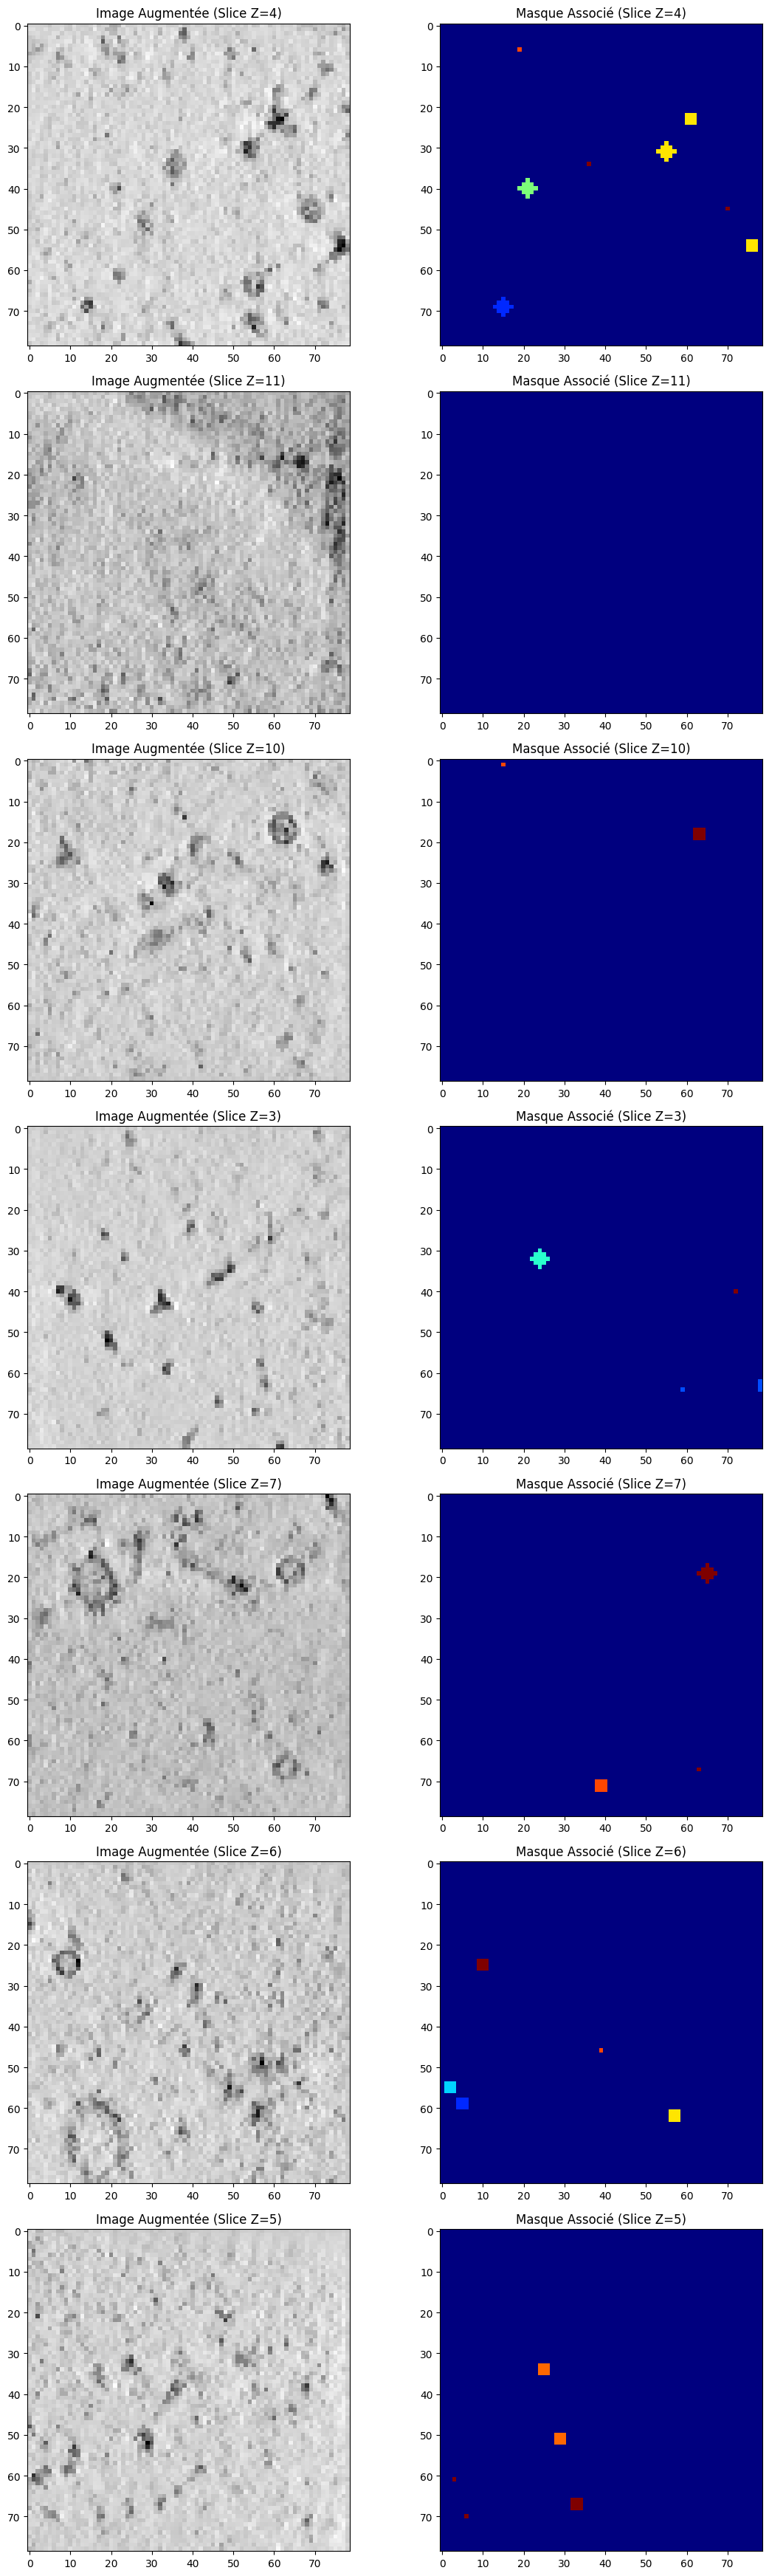

In [13]:
import matplotlib.pyplot as plt
import random

def visualize_augmented_samples(X_aug, Y_aug, num_samples=5):
    """Affiche plusieurs exemples d'images augmentées avec leurs masques."""
    indices = np.random.choice(len(X_aug), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 2, figsize=(12, num_samples * 5))

    for i, idx in enumerate(indices):
        image = X_aug[idx].squeeze()
        mask = np.argmax(Y_aug[idx], axis=-1)

        slice_idx = random.randint(0, image.shape[0] - 1)

        axes[i, 0].imshow(image[slice_idx, :, :], cmap='gray')
        axes[i, 0].set_title(f"Image Augmentée (Slice Z={slice_idx})")

        axes[i, 1].imshow(mask[slice_idx, :, :], cmap='jet')
        axes[i, 1].set_title(f"Masque Associé (Slice Z={slice_idx})")

    plt.tight_layout()
    plt.show()

visualize_augmented_samples(X_train, Y_train, num_samples=7)


In [14]:
from sklearn.model_selection import train_test_split


X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42)


X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des splits
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
print(f"Train set: {Y_train.shape}, Validation set: {Y_val.shape}, Test set: {Y_test.shape}")

Train set: (44, 23, 79, 79, 1), Validation set: (6, 23, 79, 79, 1), Test set: (6, 23, 79, 79, 1)
Train set: (44, 23, 79, 79, 7), Validation set: (6, 23, 79, 79, 7), Test set: (6, 23, 79, 79, 7)


In [15]:
def protein_accuracy(y_true, y_pred):
    y_true_labels = tf.argmax(y_true, axis=-1)
    y_pred_labels = tf.argmax(y_pred, axis=-1)
    mask = tf.not_equal(y_true_labels, 0)
    correct = tf.equal(y_true_labels, y_pred_labels)
    correct_masked = tf.boolean_mask(correct, mask)

    return tf.reduce_sum(tf.cast(correct_masked, tf.float32)) / tf.maximum(1.0, tf.reduce_sum(tf.cast(mask, tf.float32)))


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Cropping3D, Concatenate, Dropout, BatchNormalization, Activation, ZeroPadding3D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.saving import register_keras_serializable

weights_classes = {
    'background': 3,
    'apo-ferritin': 1,
    'beta-amylase': 1,
    'beta-galactosidase': 1,
    'ribosome': 1,
    'thyroglobulin': 1,
    'virus-like-particle': 1,
}

n_classes = 7

def conv_block(inputs, n_filters, dropout=0, batch_norm=True):
    x = Conv3D(n_filters, kernel_size=3, padding='same')(inputs)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv3D(n_filters, kernel_size=3, padding='same')(x)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if dropout > 0:
        x = Dropout(dropout)(x)
    return x

# Créez le modèle avec une forme d'entrée définie
def unet3d_model(input_shape, n_classes, filters=[16, 32, 64], dropout=0):
    inputs = Input(shape=input_shape)
    # Encoder
    c1 = conv_block(inputs, filters[0], dropout)
    p1 = MaxPooling3D(pool_size=(2, 2, 2), padding="same")(c1)

    c2 = conv_block(p1, filters[1], dropout)
    p2 = MaxPooling3D(pool_size=(2, 2, 2), padding="same")(c2)

    c3 = conv_block(p2, filters[2], dropout)
    p3 = MaxPooling3D(pool_size=(2, 2, 2), padding="same")(c3)

    # Bottleneck
    c4 = conv_block(p3, filters[2] * 2, dropout)
    # Decoder
    u3 = UpSampling3D(size=(2, 2, 2))(c4)
    u3 = Concatenate()([u3, c3])
    c5 = conv_block(u3, filters[2], dropout)

    u2 = UpSampling3D(size=(2, 2, 2))(c5)
    u2 = Concatenate()([u2, c2])
    c6 = conv_block(u2, filters[1], dropout)

    u1 = UpSampling3D(size=(2, 2, 2))(c6)
    c1_pad = ZeroPadding3D(padding=((0, 1), (0, 1), (0, 1)))(c1)
    u1 = Concatenate()([u1, c1_pad])
    c7 = conv_block(u1, filters[0], dropout)

    output_crop = Cropping3D(cropping=((0, 1), (0, 1), (0, 1)))(c7)
    outputs = Conv3D(n_classes, kernel_size=1, activation='softmax')(output_crop)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (23, 79, 79, 1)
n_classes = 7
filters = [16, 32, 64]
dropout = 0


In [17]:
from sklearn.utils.class_weight import compute_class_weight

y_train_labels = np.argmax(Y_train, axis=-1).ravel()
classes = np.unique(y_train_labels)

class_weights_array = compute_class_weight(
    class_weight='balanced', 
    classes=classes, 
    y=y_train_labels
)

class_weights = dict(zip(classes, class_weights_array))
print(class_weights)


{0: 0.14358764270345872, 1: 96.64420369690292, 2: 412.37215983285455, 3: 332.4503631961259, 4: 106.08704123624759, 5: 136.56277973577807, 6: 324.32432987573173}


In [18]:
import tensorflow as tf
import tensorflow.keras.backend as K
i

def weighted_categorical_crossentropy(class_weights):
    """
    class_weights: tf.constant (ou un simple tableau/list) de taille [n_classes]
    """
    # S'assurer que c'est un tenseur tf
    class_weights = tf.constant(class_weights, dtype=tf.float32)
    
    def loss(y_true, y_pred):
        """
        y_true et y_pred sont de forme [batch, ..., n_classes]
        (dans votre cas : [batch, depth, height, width, n_classes] pour de la 3D)
        """
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0) # Pour éviter log(0)
        
        weighted_logprobs = y_true * tf.math.log(y_pred) * class_weights

        return -tf.reduce_mean(tf.reduce_sum(weighted_logprobs, axis=-1))
    
    return loss


In [28]:
loss_fn = weighted_categorical_crossentropy(class_weights_array)

model = unet3d_model(input_shape=(23, 79, 79, 1), n_classes=n_classes, filters=filters, dropout=dropout)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=loss_fn,
    metrics=['accuracy', protein_accuracy]
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  # On surveille la perte sur le set de validation
                                patience=5,         # Si la perte ne baisse pas pendant 5 époques, on arrête
                                verbose=1,          # Affiche des informations sur l'arrêt anticipé
                                restore_best_weights=True)  # Restaure les poids du meilleur modèle

history = model.fit(
    X_train, Y_train,
    batch_size=1,
    epochs=5,
    validation_data=(X_val, Y_val)
    callbacks=[early_stopping]
)


Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 489ms/step - accuracy: 0.0035 - loss: 2.3999 - protein_accuracy: 0.1253 - val_accuracy: 2.5892e-04 - val_loss: 1.9244 - val_protein_accuracy: 0.0669
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.0156 - loss: 1.9384 - protein_accuracy: 0.2163 - val_accuracy: 2.5892e-04 - val_loss: 1.8211 - val_protein_accuracy: 0.0669
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.1118 - loss: 1.7822 - protein_accuracy: 0.1729 - val_accuracy: 0.8692 - val_loss: 1.7105 - val_protein_accuracy: 0.0173
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.5266 - loss: 1.6854 - protein_accuracy: 0.0978 - val_accuracy: 0.8881 - val_loss: 1.6297 - val_protein_accuracy: 0.0173
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.7675 - loss: 1.6091 - protein_accuracy: 0.0492 - val_accuracy: 0.9749 - val_loss: 1.5805 - val_protein_accuracy: 4.1876e-04


In [22]:
model.save('unet3d_trained_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


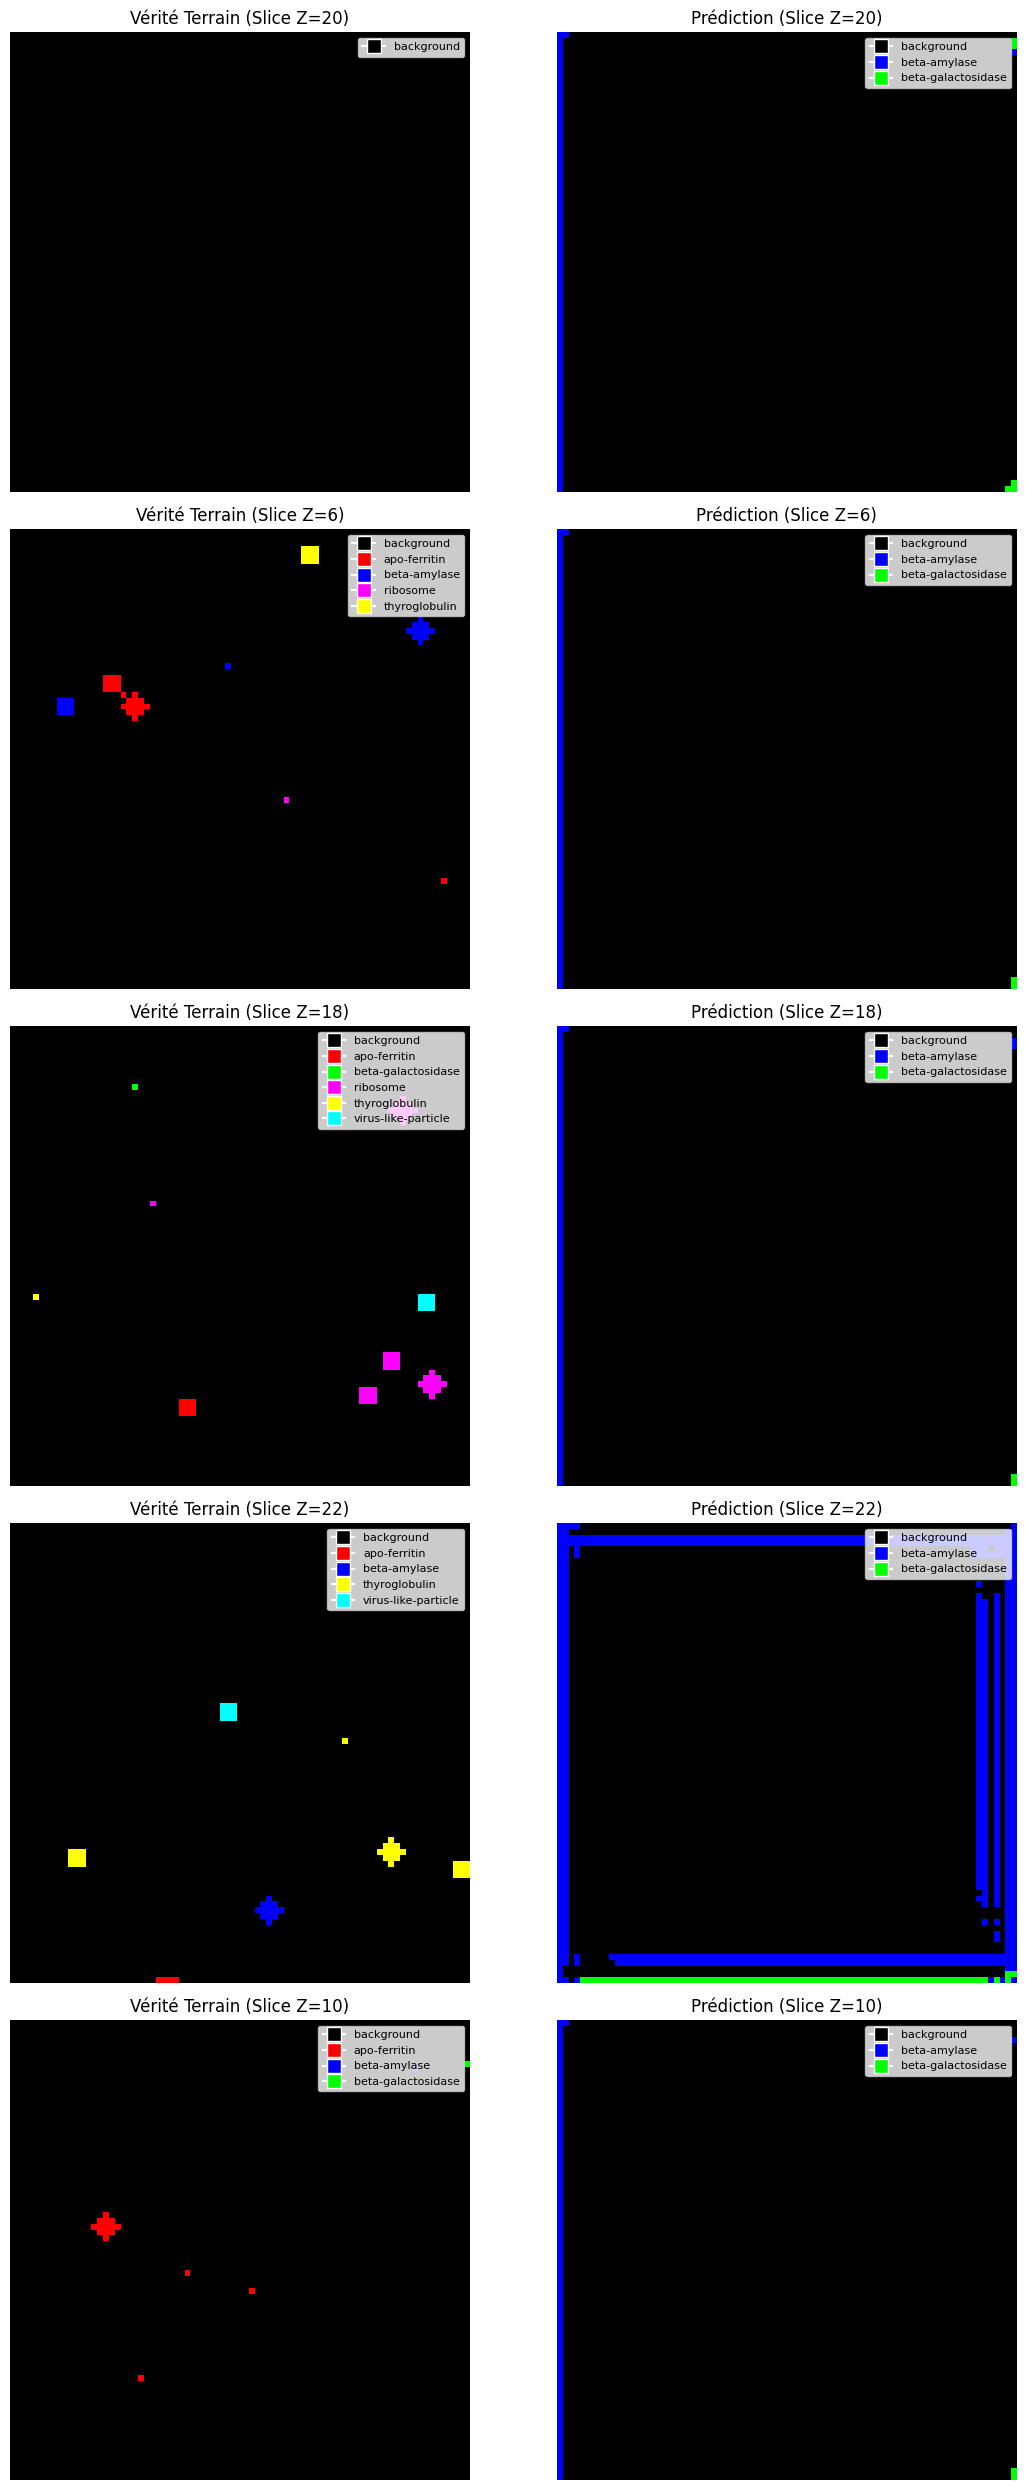

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_segmentation_results(model, X_test, Y_test, class_labels, class_colors, num_samples=5):
    """
    Visualise les résultats de la segmentation en comparant les images segmentées "vraies" et prédites.

    Args:
        model: Le modèle entraîné pour la segmentation.
        X_test: Les données d'entrée de test.
        Y_test: Les masques de vérité terrain (ground truth) pour les données de test.
        class_labels: Dictionnaire mappant les indices de classe aux noms de classe.
        class_colors: Dictionnaire mappant les indices de classe aux couleurs.
        num_samples: Nombre d'exemples à visualiser.
    """
    seed = 42
    np.random.seed(seed)
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 2, figsize=(12, num_samples * 5))

    for i, idx in enumerate(indices):
        image = X_test[idx].squeeze()
        true_mask = np.argmax(Y_test[idx], axis=-1)
        pred_mask = np.argmax(model.predict(X_test[idx][np.newaxis, ...]), axis=-1).squeeze()

        slice_idx = np.random.randint(0, image.shape[0])

        # Création d'une image colorée pour la vérité terrain
        true_colored = np.zeros((true_mask.shape[1], true_mask.shape[2], 3), dtype=np.uint8)
        for class_idx in np.unique(true_mask[slice_idx, :, :]):
            true_colored[true_mask[slice_idx, :, :] == class_idx] = class_colors[class_idx]

        # Création d'une image colorée pour la prédiction
        pred_colored = np.zeros((pred_mask.shape[1], pred_mask.shape[2], 3), dtype=np.uint8)
        for class_idx in np.unique(pred_mask[slice_idx, :, :]):
            pred_colored[pred_mask[slice_idx, :, :] == class_idx] = class_colors[class_idx]

        # Affichage de la vérité terrain
        axes[i, 0].imshow(true_colored)
        axes[i, 0].set_title(f"Vérité Terrain (Slice Z={slice_idx})")
        axes[i, 0].axis('off')

        # Ajout de la légende pour la vérité terrain
        legend_patches_true = [
            plt.Line2D([0], [0], color='white', marker='s', markersize=10, markerfacecolor=np.array(class_colors[class_idx]) / 255, label=class_labels[class_idx])
            for class_idx in np.unique(true_mask[slice_idx, :, :])
        ]
        axes[i, 0].legend(handles=legend_patches_true, loc='upper right', fontsize=8)

        # Affichage de la prédiction
        axes[i, 1].imshow(pred_colored)
        axes[i, 1].set_title(f"Prédiction (Slice Z={slice_idx})")
        axes[i, 1].axis('off')

        # Ajout de la légende pour la prédiction
        legend_patches_pred = [
            plt.Line2D([0], [0], color='white', marker='s', markersize=10, markerfacecolor=np.array(class_colors[class_idx]) / 255, label=class_labels[class_idx])
            for class_idx in np.unique(pred_mask[slice_idx, :, :])
        ]
        axes[i, 1].legend(handles=legend_patches_pred, loc='upper right', fontsize=8)

    plt.tight_layout()
    plt.show()

# Assurez-vous que class_labels et class_colors sont définis
class_labels = {
    0: "background",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "beta-galactosidase",
    4: "ribosome",
    5: "thyroglobulin",
    6: "virus-like-particle"
}

class_colors = {
    0: [0, 0, 0],        # Noir pour le fond
    1: [255, 0, 0],      # Rouge pour apo-ferritin
    2: [0, 0, 255],      # Bleu pour beta-amylase
    3: [0, 255, 0],      # Vert pour beta-galactosidase
    4: [255, 0, 255],    # Magenta pour ribosome
    5: [255, 255, 0],    # Jaune pour thyroglobulin
    6: [0, 255, 255]     # Cyan pour virus-like-particle
}

# Visualisation des résultats avec légende
visualize_segmentation_results(model, X_test, Y_test, class_labels, class_colors, num_samples=5)


In [26]:
results = model.evaluate(X_test, Y_test, batch_size=1)
print("Loss      :", results[0])
print("Accuracy  :", results[1])       # Correspond à 'accuracy' dans metrics
print("Prot. Acc :", results[2])       # Correspond à 'protein_accuracy'


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.2557 - loss: 5.0761 - protein_accuracy: 0.2054
Loss      : 5.649200439453125
Accuracy  : 0.2628759443759918
Prot. Acc : 0.14916856586933136


In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)  

y_pred_argmax = np.argmax(y_pred, axis=-1) 
y_true_argmax = np.argmax(Y_test, axis=-1) 

y_pred_flat = y_pred_argmax.flatten()
y_true_flat = y_true_argmax.flatten()

class_names = [
    cls_name for cls_name, cls_idx 
    in sorted(class_mapping.items(), key=lambda x: x[1])
]

print(class_names)

report = classification_report(
    y_true_flat,
    y_pred_flat,
    target_names=class_names
)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
['background', 'apo-ferritin', 'beta-amylase', 'beta-galactosidase', 'ribosome', 'thyroglobulin', 'virus-like-particle']
                     precision    recall  f1-score   support

         background       0.99      0.26      0.42    854987
       apo-ferritin       0.00      0.01      0.00      2094
       beta-amylase       0.00      0.06      0.00       386
 beta-galactosidase       0.00      0.10      0.00       604
           ribosome       0.00      0.54      0.00      1430
      thyroglobulin       0.00      0.22      0.00      1120
virus-like-particle       0.00      0.01      0.01       637

           accuracy                           0.26    861258
          macro avg       0.14      0.17      0.06    861258
       weighted avg       0.99      0.26      0.41    861258

